In [0]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import cv2
import earthpy.plot as ep
import code
import os
from PIL import Image

In [0]:
def downsample(image, multiplier=4):
  h = image.shape[0] // multiplier
  w = image.shape[1] // multiplier
  return cv2.resize(image, dsize=(w, h), interpolation=cv2.INTER_LINEAR)

In [0]:
def read_image(img_path):
  img = rio.open(img_path)

  band1 = np.expand_dims(img.read(1), axis=0)
  band2 = np.expand_dims(img.read(2), axis=0)
  band3 = np.expand_dims(img.read(3), axis=0)
  im = np.concatenate((band1, band2, band3), axis=0).transpose((1, 2, 0))
  return im

In [0]:
def np_to_image(arr):
  return Image.fromarray((arr / 65535.0 * 255).astype(np.uint8), 'RGB')

In [0]:
base_path = '/Users/canrobins13/Desktop/project/landsat_8'

j = 0
tile_factor = 2
for i in range(1, 9):
  if i == 3: 
    continue  # landsat_3.tif is cloudy

  img_path = os.path.join(base_path, 'original_imgs', 'landsat_{}.tif').format(i)

  hr = read_image(img_path)
  h, w, _ = hr.shape
  for r in range(tile_factor):
    for c in range(tile_factor):
      hr_path = os.path.join(base_path, 'HR_2x', 'img_{}.png'.format(j))
      hr_tile = hr[r*(h//tile_factor):(r+1)*(h//tile_factor), c*(w//tile_factor):(c+1)*(w//tile_factor), :]
      np_to_image(hr_tile).save(hr_path)

      lr = downsample(hr_tile, multiplier=2)
      lr_path = os.path.join(base_path, 'LR_2x', 'img_{}.png'.format(j))
      np_to_image(lr).save(lr_path)

      j += 1

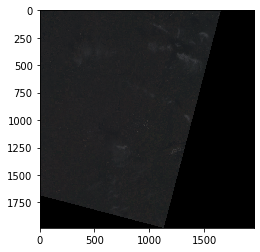

In [16]:
plt.imshow(np_to_image(lr))

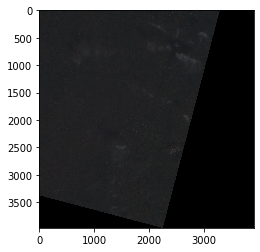

In [17]:
plt.imshow(np_to_image(hr_tile))

In [0]:
################## GENERATE IMAGE FOR OVERFITTING MODEL ##################
base_path = '/Users/canrobins13/Desktop/project/landsat_8'

hr = read_image(os.path.join(base_path, 'original_imgs/landsat_2.tif'))
hr = hr[2000:2160, 2000:2160]

np_to_image(hr).save(os.path.join(base_path, 'HR', 'overfit.png'))

lr = downsample(hr)
np_to_image(lr).save(os.path.join(base_path, 'LR', 'overfit.png'))